# Stroke Prediction : A Machine Learning Approach 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from scipy.spatial.distance import pdist,squareform
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.spatial.distance import pdist,squareform
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics,tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Importing Dataset

In [2]:
db=pd.read_csv("C:/Users/Dell/Downloads/healthcare-dataset-stroke-data.csv")
db.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#checking for null values
db.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#dropping null values
db=db.dropna()
db

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
db.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
#checking for duplicate values
db_dup = db.duplicated().any()
print(db_dup)

False


In [7]:
db

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Visualizations 

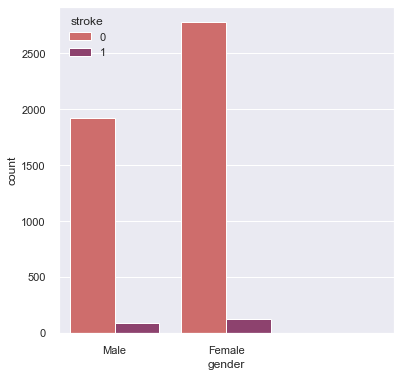

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender',hue='stroke',data= db,palette="flare")
plt.xticks([1,0]),['  Male  ','Female    ']
plt.show()

In [9]:
def continuous_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('Distribution of numerical feature : {}'.format(feature_name), fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=db,x=feature_name , kde=True, color= 'tab:blue')

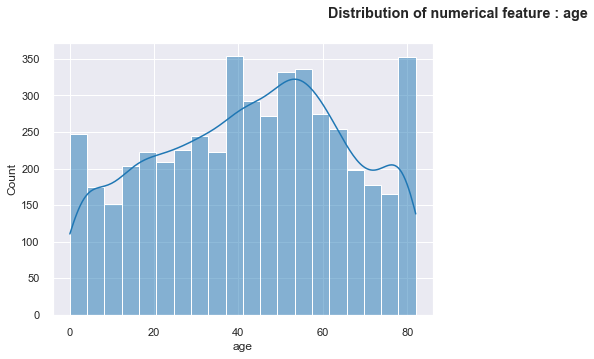

In [10]:
continuous_features=['age']
list(map(continuous_plot,continuous_features))
plt.show()

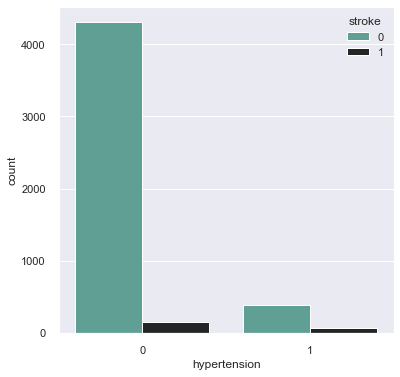

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='hypertension',hue='stroke',data= db,palette="dark:#5A9_r")
plt.xticks([1,0]),[1,0]
plt.show()

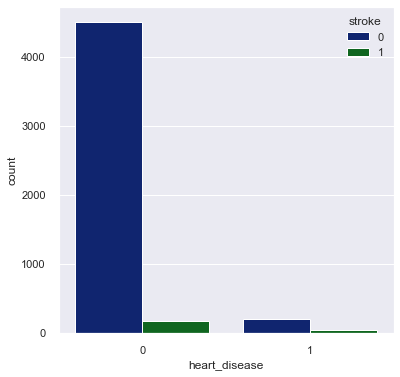

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='heart_disease',hue='stroke',data= db)
plt.xticks([1,0]),['1','0']
plt.show()

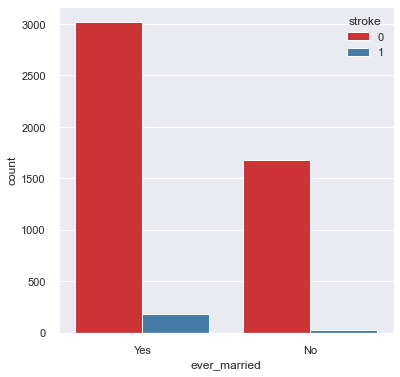

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='ever_married',hue='stroke',data= db,palette="Set1")
plt.xticks([1,0]),['  Yes  ','No    ']
plt.show()

In [14]:
db

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


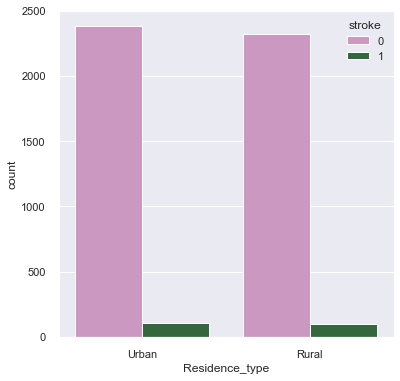

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Residence_type',hue='stroke',data= db,palette='cubehelix_r')
plt.xticks([1,0]),['  Urban  ','Rural    ']
plt.show()

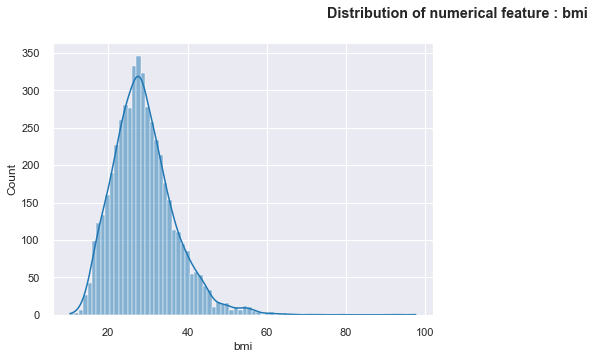

In [16]:
continuous_features=['bmi']
list(map(continuous_plot,continuous_features))
plt.show()

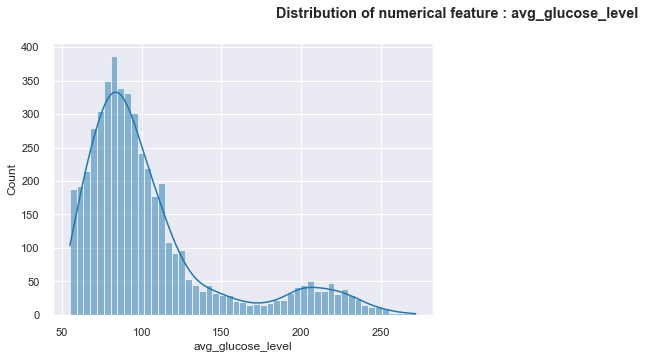

In [17]:
continuous_features=['avg_glucose_level']
list(map(continuous_plot,continuous_features))
plt.show()

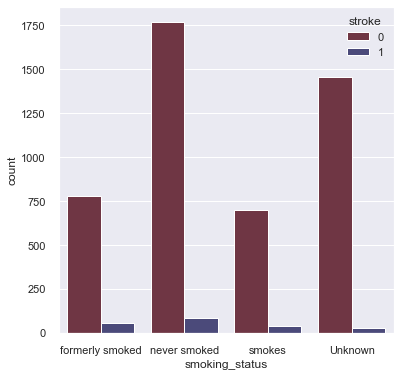

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoking_status',hue='stroke',data= db,palette="icefire_r")
plt.xticks([3,2,1,0]),['  formerly smoked  ','never smoked','smokes','Unknown']
plt.show()

### Label Encoding 

In [19]:
LE_gender = LabelEncoder()
db['gender'] = LE_gender.fit_transform(db['gender'])
LE_ever_married = LabelEncoder()
db['ever_married'] = LE_gender.fit_transform(db['ever_married'])
LE_work_type = LabelEncoder()
db['work_type'] = LE_gender.fit_transform(db['work_type'])
LE_Residence_type = LabelEncoder()
db['Residence_type'] = LE_gender.fit_transform(db['Residence_type'])
LE_smoking_status = LabelEncoder()
db['smoking_status'] = LE_gender.fit_transform(db['smoking_status'])


### Feature Selection

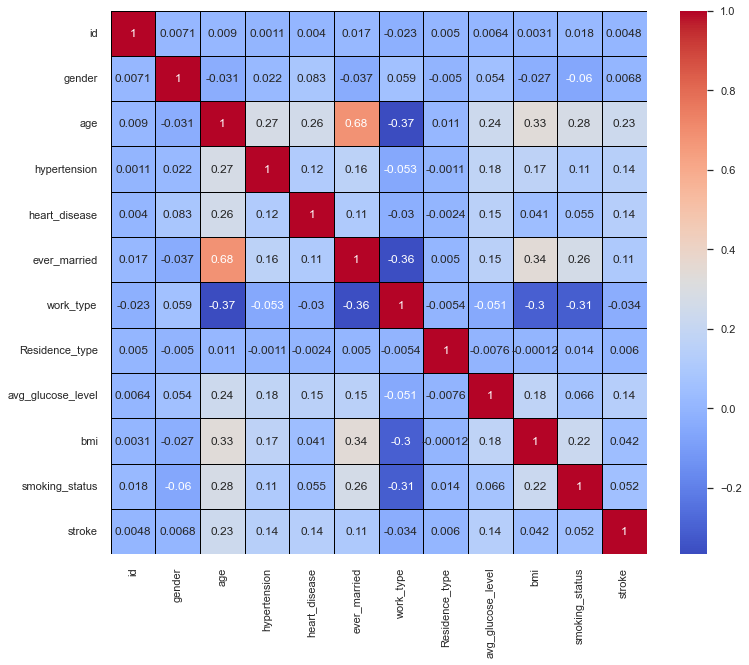

In [20]:
#Pearson Correlation Heat Map 
plt.figure(figsize=(12,10))
cor = db.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm',linewidths = 0.5,linecolor='black')
plt.show()


In [21]:
def correlation(ds, t):
    column_corr = set()
    corr_matrix = ds.corr()
    for n in range(len(corr_matrix.columns)):
        for m in range(n):
             if abs(corr_matrix.iloc[n, m]) > t:
                    colname = corr_matrix.columns[n]
                    column_corr.add(colname)
    return column_corr

In [22]:
correlation_features = correlation(db,0.5)
len(set(correlation_features))

1

In [23]:
correlation_features

{'ever_married'}

In [24]:
X_db=db.drop(labels=['stroke'],axis=1)
y_db=db['stroke']

In [25]:
#K-Means for feature Selection 
selector = SelectKBest(f_classif, k=8)
selector.fit(X_db, y_db)
np.set_printoptions(precision=3)
print(selector.scores_)
print(X_db.columns.values)


[1.149e-01 2.241e-01 2.800e+02 1.017e+02 9.518e+01 5.480e+01 5.598e+00
 1.785e-01 9.659e+01 8.826e+00 1.308e+01]
['id' 'gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'work_type' 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status']


In [26]:
feature_weights = dict(zip(X_db.columns.values, selector.scores_))
feature_weights

{'id': 0.11490138441144958,
 'gender': 0.2240734239933916,
 'age': 279.9809183274611,
 'hypertension': 101.7293613811758,
 'heart_disease': 95.1755602934637,
 'ever_married': 54.79673431008887,
 'work_type': 5.597754138338402,
 'Residence_type': 0.178513856272716,
 'avg_glucose_level': 96.58507202364312,
 'bmi': 8.826499990596135,
 'smoking_status': 13.078820608911627}

In [27]:
feature_weights = dict(sorted(feature_weights.items(), key=lambda item: item[1], reverse=True))
feature_weights

{'age': 279.9809183274611,
 'hypertension': 101.7293613811758,
 'avg_glucose_level': 96.58507202364312,
 'heart_disease': 95.1755602934637,
 'ever_married': 54.79673431008887,
 'smoking_status': 13.078820608911627,
 'bmi': 8.826499990596135,
 'work_type': 5.597754138338402,
 'gender': 0.2240734239933916,
 'Residence_type': 0.178513856272716,
 'id': 0.11490138441144958}

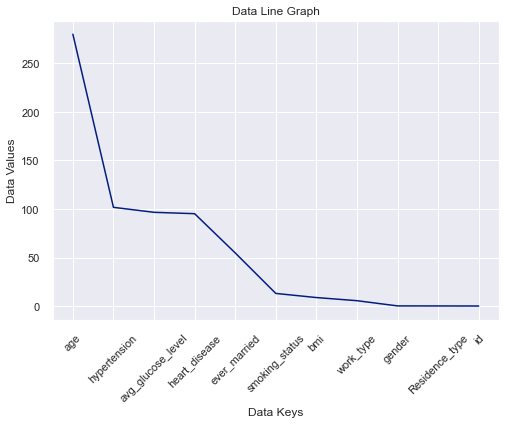

In [28]:
data = {'age': 279.9809183274611,
        'hypertension': 101.7293613811758,
        'avg_glucose_level': 96.58507202364312,
        'heart_disease': 95.1755602934637,
        'ever_married': 54.79673431008887,
        'smoking_status': 13.078820608911627,
        'bmi': 8.826499990596135,
        'work_type': 5.597754138338402,
        'gender': 0.2240734239933916,
        'Residence_type': 0.178513856272716,
        'id': 0.11490138441144958}

# Sort the data by the values in descending order
data_sorted = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract the keys and values as lists
keys = list(data_sorted.keys())
values = list(data_sorted.values())

# Plot the line graph
plt.plot(keys, values)

# Add title and axis labels
plt.title('Data Line Graph')
plt.xlabel('Data Keys')
plt.ylabel('Data Values')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the graph
plt.show()

In [29]:
#Dropping Least Significant Labels
X_train_db=X_db.drop(labels=['id'],axis=1)
X_train_db

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


### Normalization


In [30]:
#Normalization for Glucose Level
average='avg_glucose_level'
X_train_db[average]=(X_train_db[average] - X_train_db[average].min()) / (X_train_db[average].max() - X_train_db[average].min())

In [31]:
X_train_db

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,0.801265,36.6,1
2,1,80.0,0,1,1,2,0,0.234512,32.5,2
3,0,49.0,0,0,1,2,1,0.536008,34.4,3
4,0,79.0,1,0,1,3,0,0.549349,24.0,2
5,1,81.0,0,0,1,2,1,0.605161,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,0.221402,18.6,0
5106,0,81.0,0,0,1,3,1,0.323516,40.0,2
5107,0,35.0,0,0,1,3,0,0.128658,30.6,2
5108,1,51.0,0,0,1,2,0,0.513203,25.6,1


In [32]:
#Normalization for BMI
average='bmi'
X_train_db[average]=(X_train_db[average] - X_train_db[average].min()) / (X_train_db[average].max() - X_train_db[average].min())

In [33]:
#Normalization for Age
average='age'
X_train_db[average]=(X_train_db[average] - X_train_db[average].min()) / (X_train_db[average].max() - X_train_db[average].min())

In [34]:
X_train_db

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2
5,1,0.987793,0,0,1,2,1,0.605161,0.214204,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,0.157715,0,0,0,4,0,0.221402,0.095074,0
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1


### Pandas profiling

In [35]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [36]:
profile = ProfileReport(X_train_db, title="Pandas Profile Report")
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Training and testing split

In [37]:
X1_train, X1_Val, Y1_train, Y1_Val = train_test_split(X_train_db, y_db, test_size=0.1, random_state=1)


### Decision Tree

In [38]:
clf = DecisionTreeClassifier(criterion='entropy')
clf1 = clf.fit(X1_train,Y1_train)
Y1_pred = clf1.predict(X1_Val)


[Text(0.2953392094017094, 0.9772727272727273, 'age <= 0.652\nentropy = 0.251\nsamples = 4418\nvalue = [4233, 185]\nclass = no'),
 Text(0.07623626373626374, 0.9318181818181818, 'age <= 0.457\nentropy = 0.07\nsamples = 2840\nvalue = [2816, 24]\nclass = no'),
 Text(0.045787545787545784, 0.8863636363636364, 'smoking_status <= 2.5\nentropy = 0.007\nsamples = 1780\nvalue = [1779, 1]\nclass = no'),
 Text(0.040903540903540904, 0.8409090909090909, 'entropy = 0.0\nsamples = 1574\nvalue = [1574, 0]\nclass = no'),
 Text(0.05067155067155067, 0.8409090909090909, 'avg_glucose_level <= 0.097\nentropy = 0.044\nsamples = 206\nvalue = [205, 1]\nclass = no'),
 Text(0.045787545787545784, 0.7954545454545454, 'avg_glucose_level <= 0.096\nentropy = 0.124\nsamples = 59\nvalue = [58, 1]\nclass = no'),
 Text(0.040903540903540904, 0.75, 'entropy = 0.0\nsamples = 58\nvalue = [58, 0]\nclass = no'),
 Text(0.05067155067155067, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.05555555555555555

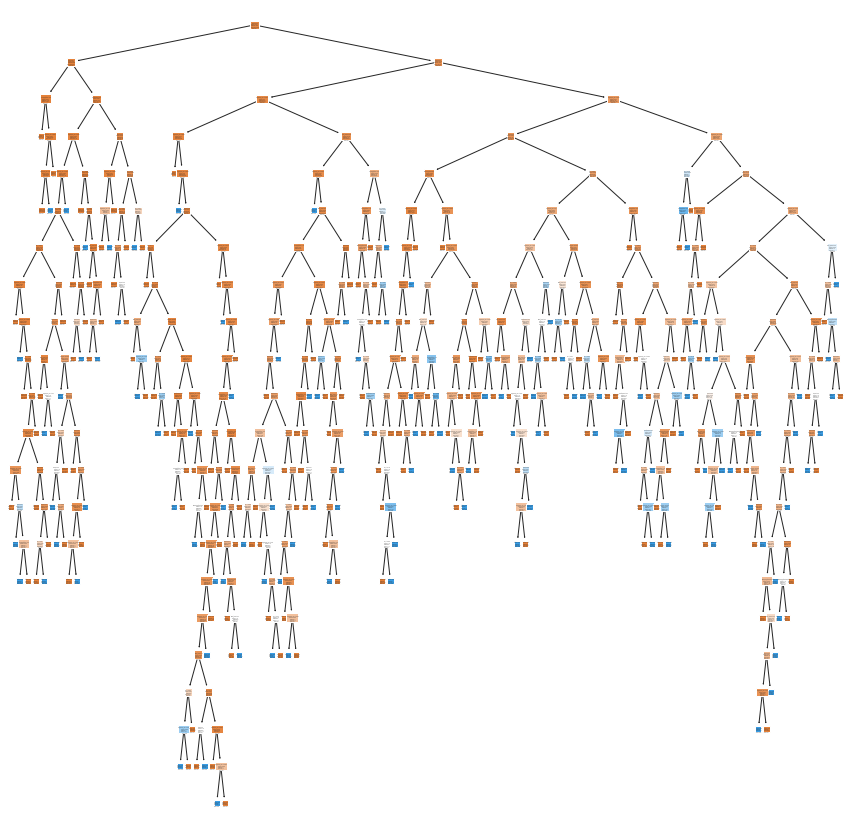

In [39]:
fn=X_train_db.keys()
cn=['no','yes']
plt.figure(figsize=(15,15))
tree.plot_tree(clf1,feature_names = fn,class_names=cn,filled=True)

In [40]:
print("Accuracy on validation set for Decision Tree model: {:.2%}:".format(metrics.accuracy_score(Y1_Val, Y1_pred)))

Accuracy on validation set for Decision Tree model: 91.45%:


In [41]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [42]:
#Hyper-Parameter Tuning 
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, None],
 "min_samples_split": randint(1,9),
 "min_samples_leaf": randint(1, 9),
 }
tree_1 = RandomizedSearchCV(clf, param_dist)
tree_1.fit(X1_train,Y1_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
                   param_distributions={'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000239C15F50A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000239C10FBD60>})

In [43]:
print("Tuned Decision Tree Parameters: {}".format(tree_1.best_params_))
print("Best score is {:.2%}:".format(tree_1.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 6}
Best score is 95.81%:


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       467
           1       0.12      0.12      0.12        24

    accuracy                           0.91       491
   macro avg       0.54      0.54      0.54       491
weighted avg       0.91      0.91      0.91       491



<AxesSubplot:>

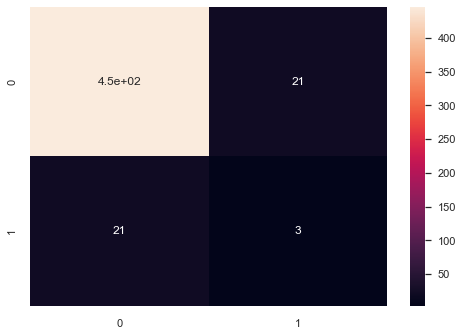

In [44]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

print(classification_report(Y1_Val, Y1_pred))

sns.heatmap(confusion_matrix(Y1_Val, Y1_pred),annot=True)


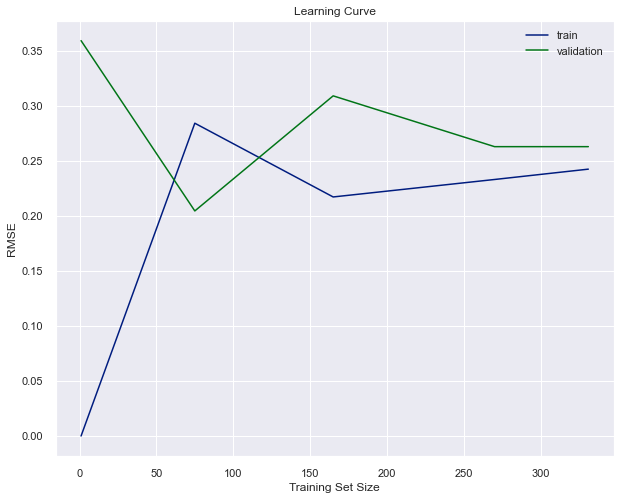

In [45]:
#Learning Curve
from sklearn.model_selection import learning_curve

clf_2_HP = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf= 8, min_samples_split= 2)
train_sizes, train_scores, test_scores = learning_curve(
 estimator=clf_2_HP,
 X=X1_train,
 y=Y1_train,
 cv=5,
 scoring="neg_root_mean_squared_error",
 train_sizes = [1, 75, 165, 270, 331]
)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

## XG Boost

In [46]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X1_train,Y1_train)
Y1_pred_xg = xgb_clf.predict(X1_Val)


In [47]:
score_xgb = xgb_clf.score(X1_Val, Y1_Val)
print("Accuracy on validation set for XGB model: {:.2%}".format(score_xgb))

Accuracy on validation set for XGB model: 94.30%


In [48]:
print(classification_report(Y1_Val, Y1_pred_xg))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       467
           1       0.17      0.04      0.07        24

    accuracy                           0.94       491
   macro avg       0.56      0.52      0.52       491
weighted avg       0.91      0.94      0.93       491



<AxesSubplot:>

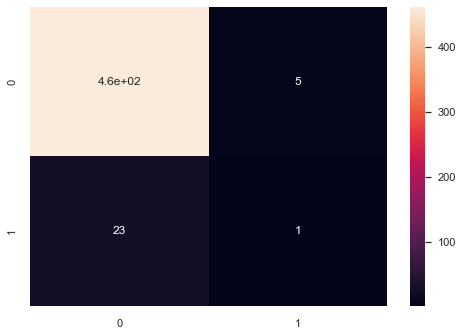

In [49]:
#Confusion Matrix
sns.heatmap(confusion_matrix(Y1_Val, Y1_pred_xg),annot=True)

In [50]:
params = {
 'min_child_weight': [1, 5, 10, 15],
 'gamma': [0.5, 1, 1.5, 2, 5, 10, 15],
 'subsample': [0.6, 0.8, 1.0, 1,2],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5, 6, 8, 10],
 'eta': [0.001, 0.01, 0.1, 1, 10],
 'learning_rate': [0.001, 0.01, 0.1, 1, 10]
 }


In [51]:
#Hyper-Parameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
skf = RepeatedStratifiedKFold(n_splits=500, n_repeats=200, random_state = 1001)
rand_search_xg = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, verbose=3)

In [52]:
Data_transformed_xg = PowerTransformer().fit_transform(X1_Val)
rand_search_xg.fit(Data_transformed_xg, Y1_Val, eval_metric='logloss')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30000001...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                       

In [53]:
rand_search_xg.best_params_


{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 10,
 'gamma': 10,
 'eta': 10,
 'colsample_bytree': 0.6}

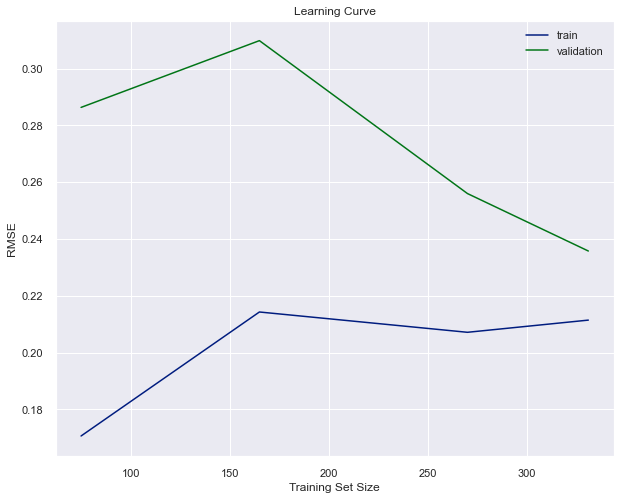

In [54]:
#Learning Curve
xgb_clf_HP = XGBClassifier(subsample= 1, min_child_weight= 1,max_depth= 5,learning_rate= 0.01,gamma= 1,eta= 10,colsample_bytree= 1 )
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_clf_HP,
    X=X1_train,
    y=Y1_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

In [55]:
rand_search_xg.best_score_

0.9511234796949083

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
import pydot
from xgboost import XGBClassifier
import io
%matplotlib inline

clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X1_train,Y1_train)
y_pred_rf=clf_rf.predict(X1_Val)
print("Accuracy on validation set for Random Forest model: {:.2%}: ".format(metrics.accuracy_score(Y1_Val, y_pred_rf)))


Accuracy on validation set for Random Forest model: 95.11%: 


In [57]:
tree_small = clf_rf.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = fn, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [58]:
#Hyper-Parameter Tuning 
param_grid = {
'n_estimators': [50, 100, 200, 300],
'min_samples_leaf': [1, 5, 10],
'max_depth': [2, 4, 6, 8, 10],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}
forest_1_HP = RandomizedSearchCV(clf_rf, param_dist)
forest_1_HP.fit(X1_train,Y1_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000239C15F50A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000239C10FBD60>})

In [59]:
print("Tuned Random Forest Parameters: {}".format(forest_1_HP.best_params_))
print("Best score is {}".format(forest_1_HP.best_score_))

Tuned Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 5}
Best score is 0.9581258359254494


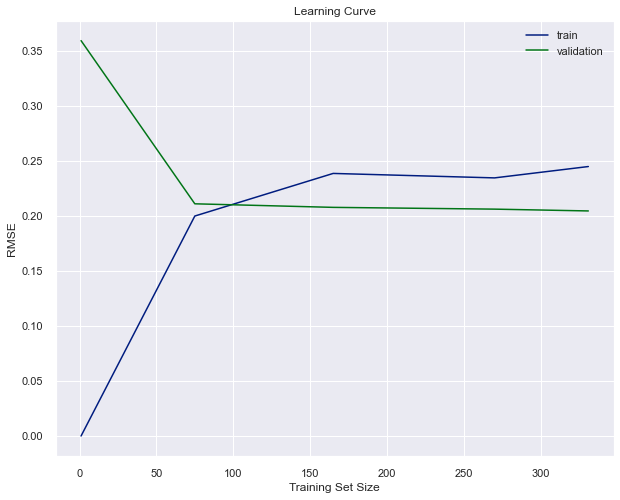

In [60]:
#Learning Curve
forest_2_HP = RandomForestClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 5)
train_sizes, train_scores, test_scores = learning_curve(
 estimator=forest_2_HP,
 X=X1_train,
 y=Y1_train,
 cv=5,
 scoring="neg_root_mean_squared_error",
 train_sizes = [1, 75, 165, 270, 331]
)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()


In [61]:
print(classification_report(Y1_Val, y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       467
           1       0.00      0.00      0.00        24

    accuracy                           0.95       491
   macro avg       0.48      0.50      0.49       491
weighted avg       0.90      0.95      0.93       491



<AxesSubplot:>

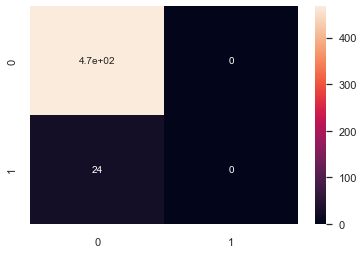

In [62]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y1_Val, y_pred_rf),annot=True)

## Model Comparision based on accuracy 


Decision Tree: 0.944939 (0.024292)
Random Forest: 0.951143 (0.026080)
XGB: 0.942857 (0.036278)


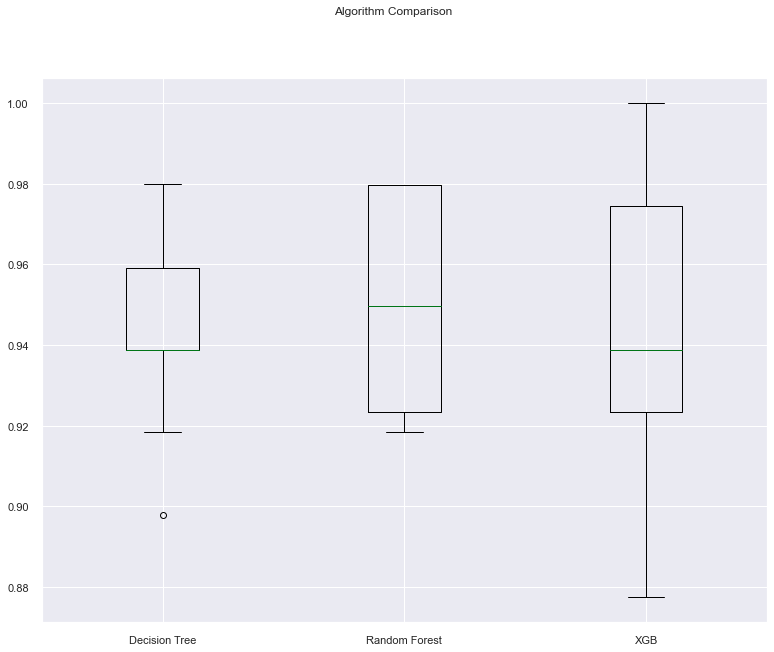

In [63]:
from sklearn import model_selection
models = []

models.append(('Decision Tree', clf_2_HP))
models.append(('Random Forest', forest_2_HP))
models.append(('XGB', xgb_clf_HP))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=None)
 cv_results = model_selection.cross_val_score(model, X1_Val, Y1_Val, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(13, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
# plt.figure(figsize=(15, 15))
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Statistical Significance - Paired t-test

In [64]:
from scipy import stats
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf_2_HP,
estimator2=forest_2_HP,
X=X1_train, y=Y1_train,
 random_seed=1)
alpha = 0.05
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p > alpha:
 print("Failed to reject null hypotesis since p-value > 0.05")
else:
 print("We can reject null hypotesis since p-value < 0.05. Hence we can conclude that both the models are significantly different")

t statistic: 0.000
p value: 1.000
Failed to reject null hypotesis since p-value > 0.05


In [65]:
from scipy import stats
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf_2_HP,
estimator2=xgb_clf_HP,
X=X1_train, y=Y1_train,
 random_seed=1)
alpha = 0.05
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p > alpha:
 print("Failed to reject null hypotesis since p-value > 0.05")
else:
 print("We can reject null hypotesis since p-value < 0.05. Hence we can conclude that both the models are significantly different")

t statistic: 1.007
p value: 0.360
Failed to reject null hypotesis since p-value > 0.05


In [66]:
from scipy import stats
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=forest_2_HP,
estimator2=xgb_clf_HP,
X=X1_train, y=Y1_train,
 random_seed=1)
alpha = 0.05
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p > alpha:
 print("Failed to reject null hypotesis since p-value > 0.05")
else:
 print("We can reject null hypotesis since p-value < 0.05. Hence we can conclude that both the models are significantly different")

t statistic: 1.355
p value: 0.233
Failed to reject null hypotesis since p-value > 0.05
